# <center>EDSA Team 18 Project</center>

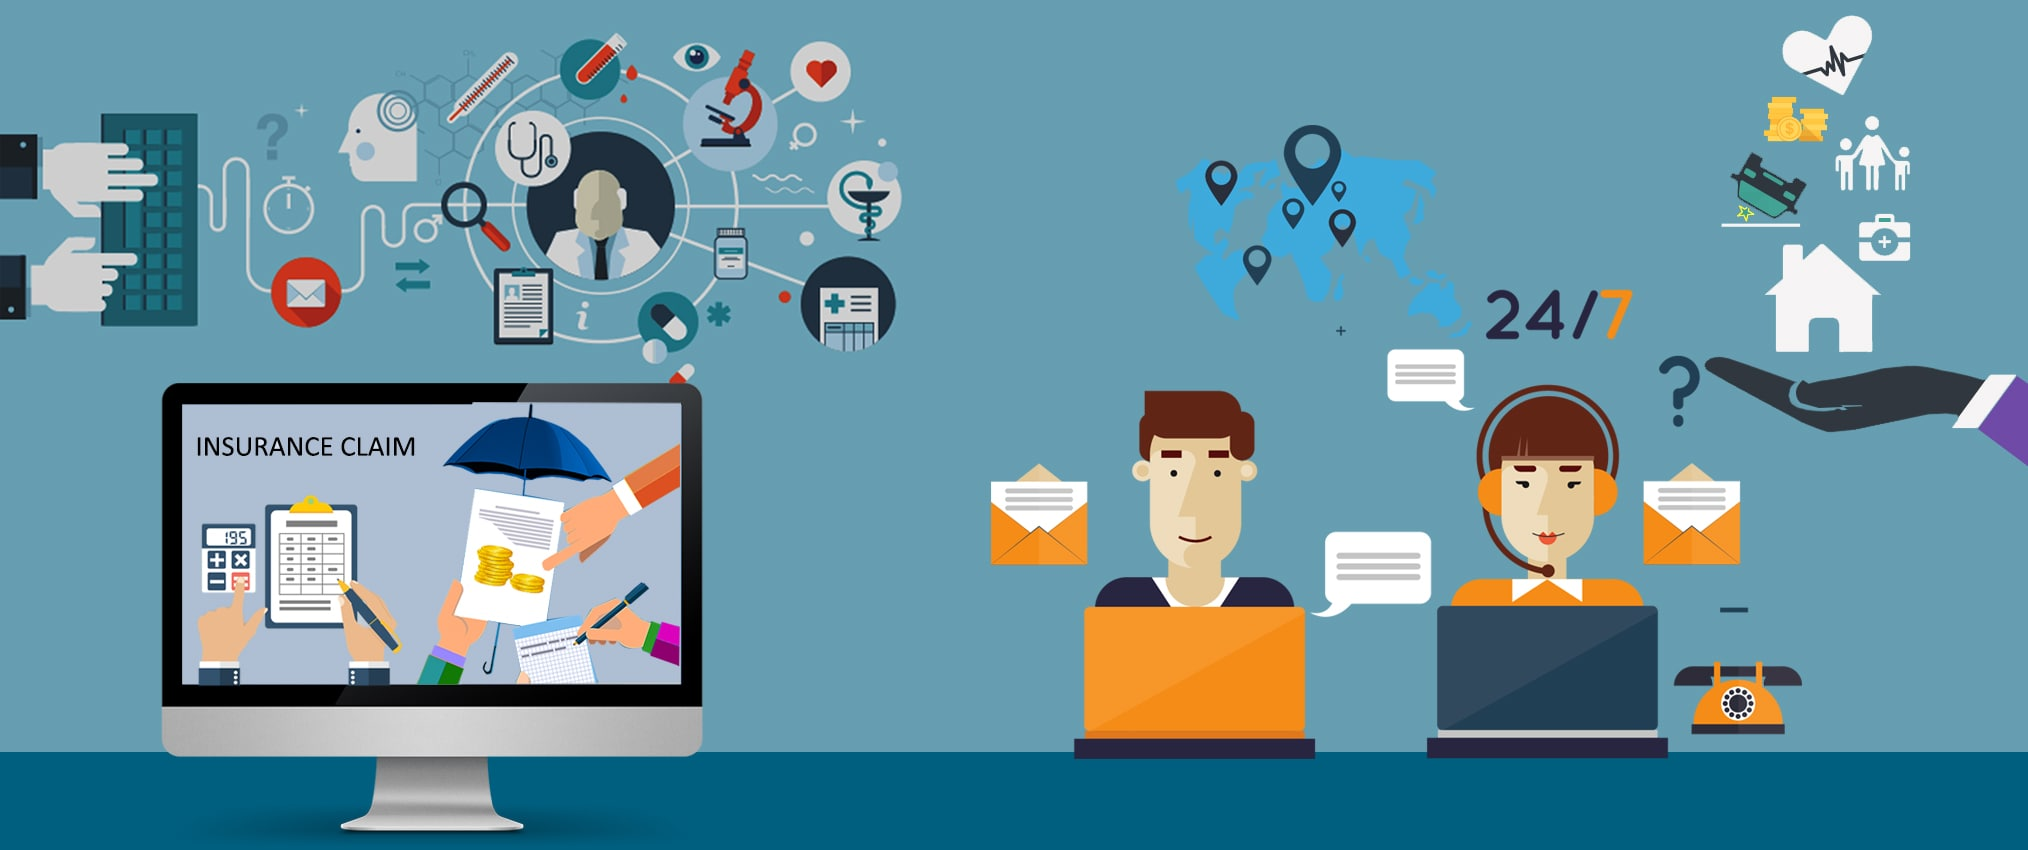

<a id='Table_Contents'></a><br>
### Table of Contents
1. [Introduction](#intro)
 
 
2. [Data](#imports_data)
 * Importing Packages
 * Loading Data
 * Dataset Description
 * Checking for Missing Values
 
3. [Exploratory Data Analysis](#EDA)
 




<a id='intro'></a><br>
## 1. Introduction
[Back to Table of Contents](#Table_Contents)


The aim of this project is to predict the total claim amount per exposure, for specific risk profiles. A risk profile describes a policyholder (someone who is a client and owns a policy at the insurer), things like age, gender, marital status, etc. These attributes can all be found in the dataset used in this project. The reason for doing this is so that the predicted claim can be used to calculate a premium for new applicants, based on their predicted risk. This way the insurer maximises profits by charging higher premiums for higher risk profiles. It is important to consider however that accompanying a higher premium, the insurer should maintain sensibility in deciding on a premium and still outcompete competitor insurers, which make business rules essential. 

<a id='imports_data'></a><br>
## 2. Data
[Back to Table of Contents](#Table_Contents)

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from time import time
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display_html 
from IPython.core.display import HTML
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go


## Loading Data

We first load the data and inspect its head.

In [2]:
df = pd.read_excel('DataSet.xlsx')
#df.head()

In [3]:
# Data shape
df.shape

(262990, 45)

The data has 262990 rows with 45 features.

In [4]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262990 entries, 0 to 262989
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   PolicyId                              262990 non-null  int64         
 1   ClaimId                               27478 non-null   float64       
 2   SumTotalClaimAmount                   27392 non-null   float64       
 3   CountTotalClaimAmount                 27478 non-null   float64       
 4   PremiumSum                            262750 non-null  float64       
 5   CasePremiumSum                        262750 non-null  float64       
 6   PaymentDueDate                        262750 non-null  datetime64[ns]
 7   TotalPremiumPaymentCount              262750 non-null  float64       
 8   PreviousInsurerExcess                 262963 non-null  float64       
 9   PreviousInsurerPremium                262961 non-null  floa

In [5]:
# Data Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PolicyId,262990.0,1.084961e+07,51720.661654,1.076784e+07,1.080422e+07,1.084769e+07,1.089272e+07,1.095790e+07
ClaimId,27478.0,1.010507e+07,15069.963591,1.007378e+07,1.009240e+07,1.010566e+07,1.011831e+07,1.012987e+07
SumTotalClaimAmount,27392.0,4.059307e+04,65213.503869,0.000000e+00,3.415500e+03,1.391817e+04,4.461965e+04,1.754000e+06
CountTotalClaimAmount,27478.0,1.256787e+00,0.574605,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
PremiumSum,262750.0,4.589583e+03,3538.634556,0.000000e+00,1.988050e+03,3.568235e+03,6.351193e+03,4.182255e+04
CasePremiumSum,262750.0,3.709207e+03,3718.507791,0.000000e+00,7.191375e+02,2.743360e+03,5.620938e+03,4.182255e+04
TotalPremiumPaymentCount,262750.0,4.623604e+00,4.066673,0.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.400000e+01
PreviousInsurerExcess,262963.0,2.923134e+03,6031.299346,-1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+03,8.000000e+05
PreviousInsurerPremium,262961.0,5.767832e+02,654.862704,-1.700000e+03,0.000000e+00,4.580000e+02,1.070000e+03,2.300000e+04
IsMemberPayer,262990.0,9.662154e-01,0.180675,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# Percentage Missing values
df.isnull().mean().sort_values(ascending=False)*100

Employer                                97.229552
SumTotalClaimAmount                     89.584395
ClaimId                                 89.551694
CountTotalClaimAmount                   89.551694
PolicyEndDate                           48.745580
DaysSinceInception                      48.745580
MonthsSinceInception                    48.745580
Area                                    25.515419
SumAssured                              15.992243
IndustryType                             1.570782
EmploymentType                           1.009924
Occupation                               0.854025
TotalPremiumPaymentCount                 0.091258
PaymentDueDate                           0.091258
CasePremiumSum                           0.091258
PremiumSum                               0.091258
PreviousInsurerPremium                   0.011027
PreviousInsurerExcess                    0.010267
Gender                                   0.003042
PolicyStatus                             0.002281


We observe that Employer, SumTotalClaimAmount, ClaimId and CountTotalClaimAmount columns all have a high percentage of missing values (over 89%). PolicyEndDate, DaysSinceInception and MonthsSinceInception have 48% missing values while Area has 25% and SumAssured has 15%. These columns will be further explored in the data preprocessing section of the project.                                                                                                                                                                                                         

<a id='EDA'></a><br>
## 3. Exploratory Data Analysis
[Back to Table of Contents](#Table_Contents)
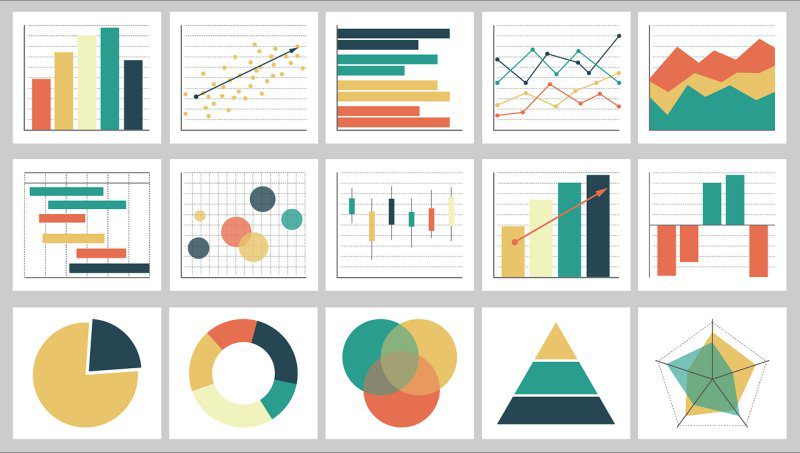

In this section we perform exploratory data analysis on the data to gain a better understanding of the features and the relationships between them. We will employ both statistical and visualisation methods of EDA.

## Data Cleaning 
We do the following basic data cleaning before embarking on the EDA:
1. Drop the last column as it is irrelevant
2. Impute NaN values in the 'SumTotalClaimAmount' and 'CountTotalClaimAmount' columns with 0
3. Create an 'Age' column using 'BirthDt'

In [7]:
#Drop the last column
df = df.iloc[: , :-1]
df['SumTotalClaimAmount'].fillna(0, inplace=True)
df['CountTotalClaimAmount'].fillna(0, inplace=True)


In [8]:
#Create Age column
now = pd.Timestamp('now')
df['BirthDt'] = pd.to_datetime(df['BirthDt'], format='%m%d%y')    # 1
df['BirthDt'] = df['BirthDt'].where(df['BirthDt'] < now, df['BirthDt'] -  np.timedelta64(100, 'Y'))   # 2
df['Age'] = (now - df['BirthDt']).astype('<m8[Y]')

## Correlation of Features
We explore the correlation of the features to the target variable and to each other.

In [9]:
print(list(df.columns))

['PolicyId', 'ClaimId ', 'SumTotalClaimAmount', 'CountTotalClaimAmount', 'PremiumSum', 'CasePremiumSum', 'PaymentDueDate', 'TotalPremiumPaymentCount', 'PreviousInsurerExcess', 'PreviousInsurerPremium', 'EmploymentType', 'IsMemberPayer', 'Employer', 'Occupation', 'IndustryType', 'Gender', 'BirthDt', 'MaritalStatus', 'Make', 'Model', 'Colour', 'Transmission', 'VehicleType', 'BodyType', 'CubicCapacity', 'Cyl', 'Kilowatts', 'VehicleYear', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area', 'MonthsSinceInception', 'DaysSinceInception', 'PolicyStatus', 'CommencementDt', 'PolicyEndDate', 'SumAssured', 'MeanExcess', 'TotalExcess', 'ExcessTypesCount', 'BaseExcess', 'NomimatedDriversCount', 'NomimatedDriversUnder30Count', 'Age']


In [10]:
#Correlation of features
columns = list(df.columns)
irrelevant_feat = ['PolicyId', 'ClaimId ', 'VehicleYear']
relevant_feat = [x for x in columns if x not in irrelevant_feat]
df[relevant_feat].corr()

,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,IsMemberPayer,CubicCapacity,Cyl,...,MonthsSinceInception,DaysSinceInception,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,Age
SumTotalClaimAmount,1.000000,0.553535,0.062766,0.062803,0.032719,0.016626,0.025488,0.002995,-0.011273,-0.015999,...,0.026448,0.026788,0.058844,0.058158,0.013615,-0.041177,0.018144,-0.001243,0.011733,-0.046521
CountTotalClaimAmount,0.553535,1.000000,0.219611,0.224151,0.199623,0.013259,0.028129,0.005359,-0.018159,-0.018181,...,0.158876,0.160093,0.045395,0.053107,0.054557,0.025593,-0.020909,0.023299,0.027678,-0.054021
PremiumSum,0.062766,0.219611,1.000000,0.929425,0.779827,0.066375,0.157109,0.009417,0.029850,-0.024453,...,0.533948,0.534514,0.326275,0.303627,0.346171,0.177192,0.034578,0.100676,0.073290,-0.132098
CasePremiumSum,0.062803,0.224151,0.929425,1.000000,0.883102,0.045597,0.107036,-0.000763,0.017296,-0.025852,...,0.610786,0.612088,0.252367,0.259096,0.387786,0.293609,0.014279,0.117991,0.077908,-0.087365
TotalPremiumPaymentCount,0.032719,0.199623,0.779827,0.883102,1.000000,-0.004766,-0.006639,-0.012016,-0.001139,0.002072,...,0.675016,0.676747,-0.016324,0.009930,0.193603,0.293913,-0.069833,0.145511,0.078316,0.021725
PreviousInsurerExcess,0.016626,0.013259,0.066375,0.045597,-0.004766,1.000000,0.442726,0.026939,-0.062386,-0.054648,...,0.011308,0.011492,0.117590,0.120901,0.081235,-0.013035,0.083602,-0.041376,-0.010484,-0.126396
PreviousInsurerPremium,0.025488,0.028129,0.157109,0.107036,-0.006639,0.442726,1.000000,0.045403,-0.054820,-0.062145,...,0.017792,0.018161,0.279245,0.169071,0.114564,-0.036698,0.002855,-0.039142,-0.016626,-0.152332
IsMemberPayer,0.002995,0.005359,0.009417,-0.000763,-0.012016,0.026939,0.045403,1.000000,-0.015671,-0.007861,...,-0.006163,-0.006256,0.014238,0.016676,-0.004235,-0.027872,0.002051,-0.077356,-0.052299,-0.072950
CubicCapacity,-0.011273,-0.018159,0.029850,0.017296,-0.001139,-0.062386,-0.054820,-0.015671,1.000000,0.714084,...,-0.007508,-0.007432,0.243099,0.042146,0.013468,-0.028300,-0.046639,0.037027,-0.020122,0.234428
Cyl,-0.015999,-0.018181,-0.024453,-0.025852,0.002072,-0.054648,-0.062145,-0.007861,0.714084,1.000000,...,-0.004858,-0.004612,0.023766,-0.079592,-0.085160,-0.041439,-0.070697,0.030240,-0.006069,0.145129


<AxesSubplot:>

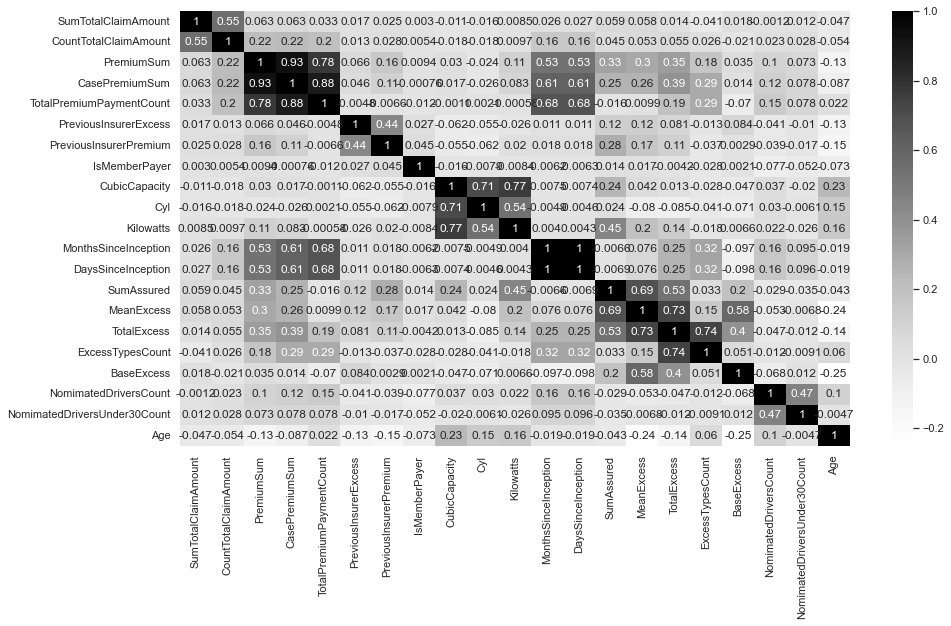

In [11]:
#Correlation Heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df[relevant_feat].corr(), annot=True, cmap='Greys')

From the correlation heatmap above we observe the following:
1. The target variable 'SumTotalClaimAmount' is not highly correlated to any of the features
2. Strong correlation between 'PremiumSum' and 'CasePremiumSum', 'PremiumSum' and 'TotalPremiumPaymentCount', 'CasePremiumSum' and 'TotalPremiumPaymentCount', 'CubicCapacity' and 'Killowatts', 'MeanExcess' and 'TotalExcess'
3. Moderate correlation between 'SumTotalClaimAmount' and 'CountTotalClaimAmount', 'PremiumSum' and 'MonthsSinceInception', 'PremiumSum' and 'DaysSinceInception', 'PremiumSum' and 'SumAssured', 'PremiumSum' and 'MeanExcess', 'PremiumSum' and 'TotalExcess', 'CasePremiumSum' and 'MonthsSinceInception', 'CasePremiumSum' and 'DaysSinceInception', 'CasePremiumSum' and 'TotalExcess'
3. Weak correlation between all the other features

## Categorical Features 
Next we explore how categorical features such as EmploymentType, Gender affect the claim amount

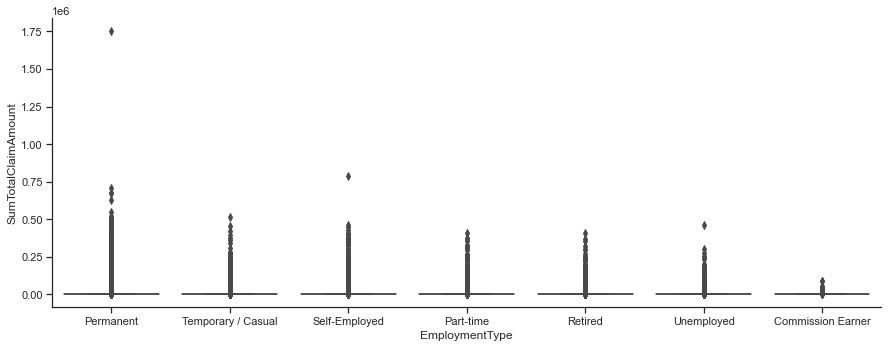

In [12]:
#Claim amount distribution per employment type
sns.set_theme(style="ticks")
sns.catplot(x="EmploymentType", y="SumTotalClaimAmount", data=df, kind='box', height=5, aspect=2.5)

We observe that Permanent employees have a higher claim amount with Commission earners having the least amount.

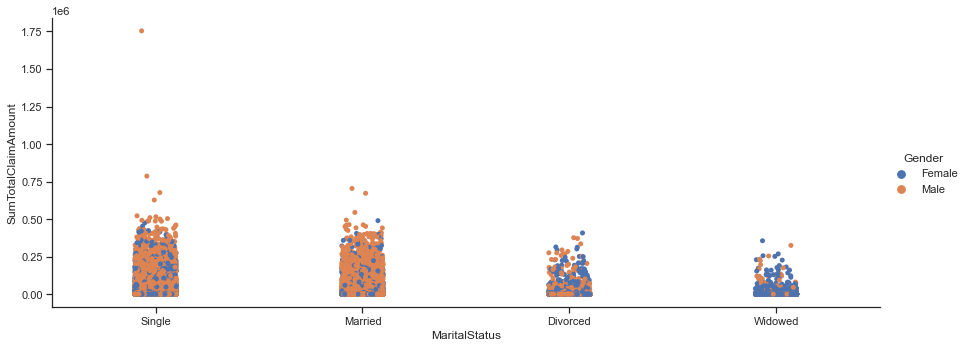

In [13]:
#Gender and Marital status distribution
sns.catplot(x="MaritalStatus", y="SumTotalClaimAmount", hue="Gender",
                 data=df, height=5, aspect=2.5)

We observe that singles claim more as compared to the other marital status with males claiming more than females in each of the status

['PolicyId', 'ClaimId ', 'SumTotalClaimAmount', 'CountTotalClaimAmount', 'PremiumSum', 'CasePremiumSum', 'PaymentDueDate', 'TotalPremiumPaymentCount', 'PreviousInsurerExcess', 'PreviousInsurerPremium', 'EmploymentType', 'IsMemberPayer', 'Employer', 'Occupation', 'IndustryType', 'Gender', 'BirthDt', 'MaritalStatus', 'Make', 'Model', 'Colour', 'Transmission', 'VehicleType', 'BodyType', 'CubicCapacity', 'Cyl', 'Kilowatts', 'VehicleYear', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area', 'MonthsSinceInception', 'DaysSinceInception', 'PolicyStatus', 'CommencementDt', 'PolicyEndDate', 'SumAssured', 'MeanExcess', 'TotalExcess', 'ExcessTypesCount', 'BaseExcess', 'NomimatedDriversCount', 'NomimatedDriversUnder30Count', 'Age']


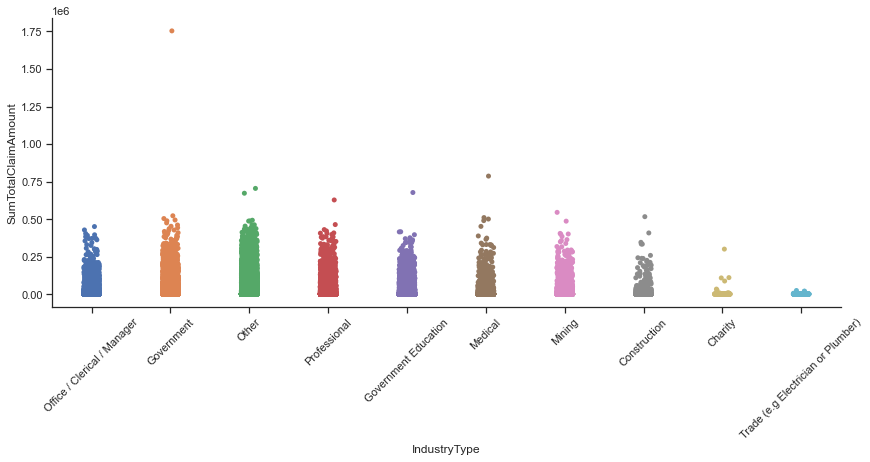

In [19]:
#Occupation
sns.catplot(x="IndustryType", y="SumTotalClaimAmount",
            data=df, height=5, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

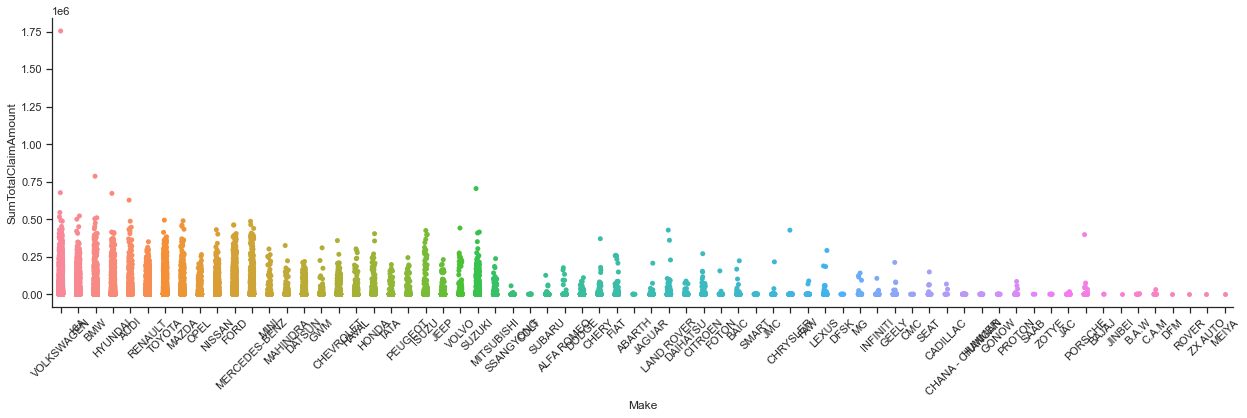

In [22]:
#Make of Vehicle
sns.catplot(x="Make", y="SumTotalClaimAmount",
            data=df, height=5, aspect=3.5)
plt.xticks(rotation=45)
plt.show()

['PolicyId', 'ClaimId ', 'SumTotalClaimAmount', 'CountTotalClaimAmount', 'PremiumSum', 'CasePremiumSum', 'PaymentDueDate', 'TotalPremiumPaymentCount', 'PreviousInsurerExcess', 'PreviousInsurerPremium', 'EmploymentType', 'IsMemberPayer', 'Employer', 'Occupation', 'IndustryType', 'Gender', 'BirthDt', 'MaritalStatus', 'Make', 'Model', 'Colour', 'Transmission', 'VehicleType', 'BodyType', 'CubicCapacity', 'Cyl', 'Kilowatts', 'VehicleYear', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area', 'MonthsSinceInception', 'DaysSinceInception', 'PolicyStatus', 'CommencementDt', 'PolicyEndDate', 'SumAssured', 'MeanExcess', 'TotalExcess', 'ExcessTypesCount', 'BaseExcess', 'NomimatedDriversCount', 'NomimatedDriversUnder30Count', 'Age']


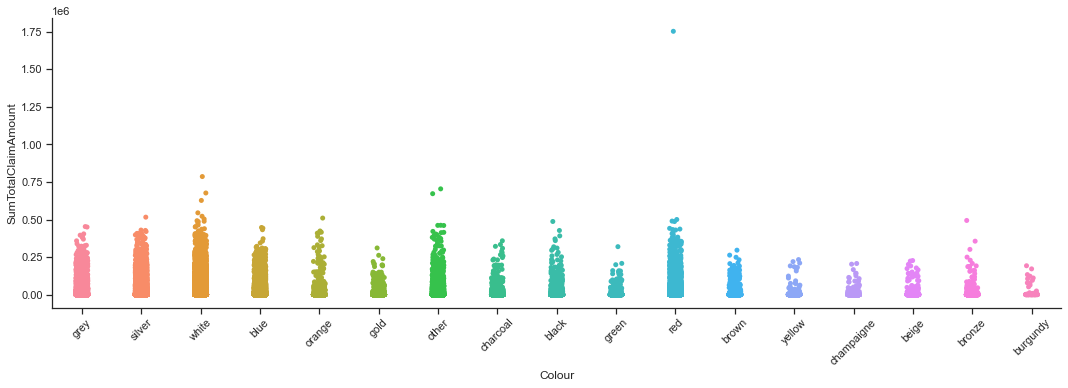

In [25]:
#Colour
sns.catplot(x="Colour", y="SumTotalClaimAmount",
            data=df, height=5, aspect=3)
plt.xticks(rotation=45)
plt.show()

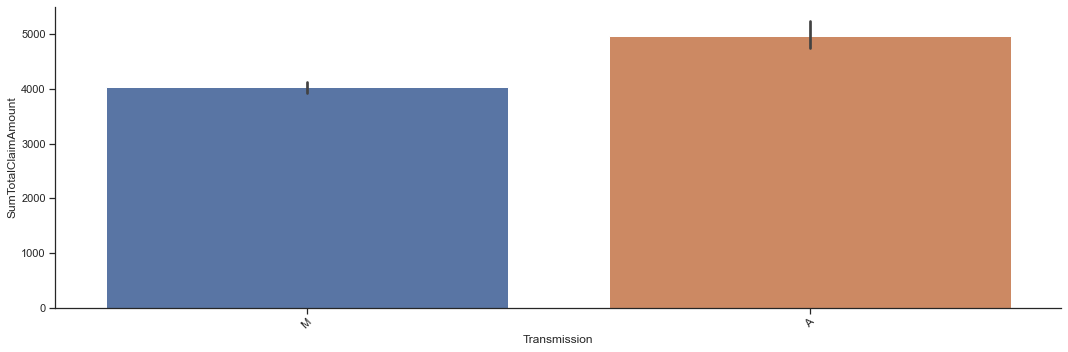

In [28]:
#Transmission
sns.catplot(x="Transmission", y="SumTotalClaimAmount",
            data=df, kind='bar', height=5, aspect=3)
plt.xticks(rotation=45)
plt.show()

We observe that automatic vehicles have more claim amounts as compared to manual vehicles.

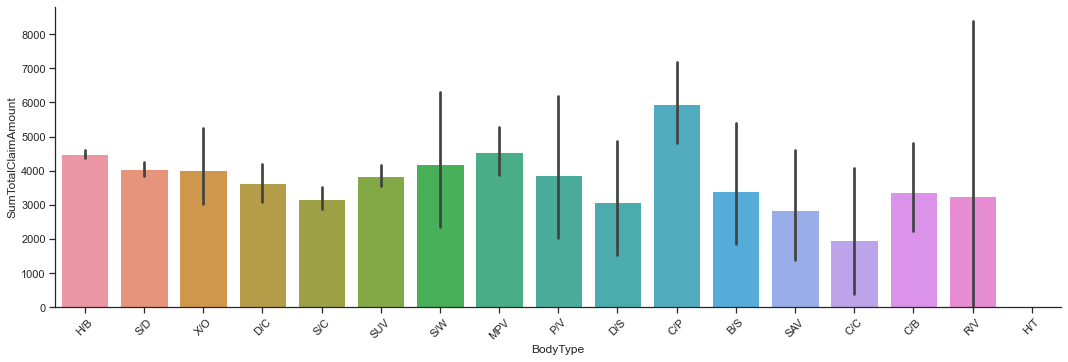

In [29]:
#Body Type
sns.catplot(x="BodyType", y="SumTotalClaimAmount",
            data=df, kind='bar', height=5, aspect=3)
plt.xticks(rotation=45)
plt.show()

['PolicyId', 'ClaimId ', 'SumTotalClaimAmount', 'CountTotalClaimAmount', 'PremiumSum', 'CasePremiumSum', 'PaymentDueDate', 'TotalPremiumPaymentCount', 'PreviousInsurerExcess', 'PreviousInsurerPremium', 'EmploymentType', 'IsMemberPayer', 'Employer', 'Occupation', 'IndustryType', 'Gender', 'BirthDt', 'MaritalStatus', 'Make', 'Model', 'Colour', 'Transmission', 'VehicleType', 'BodyType', 'CubicCapacity', 'Cyl', 'Kilowatts', 'VehicleYear', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area', 'MonthsSinceInception', 'DaysSinceInception', 'PolicyStatus', 'CommencementDt', 'PolicyEndDate', 'SumAssured', 'MeanExcess', 'TotalExcess', 'ExcessTypesCount', 'BaseExcess', 'NomimatedDriversCount', 'NomimatedDriversUnder30Count', 'Age']


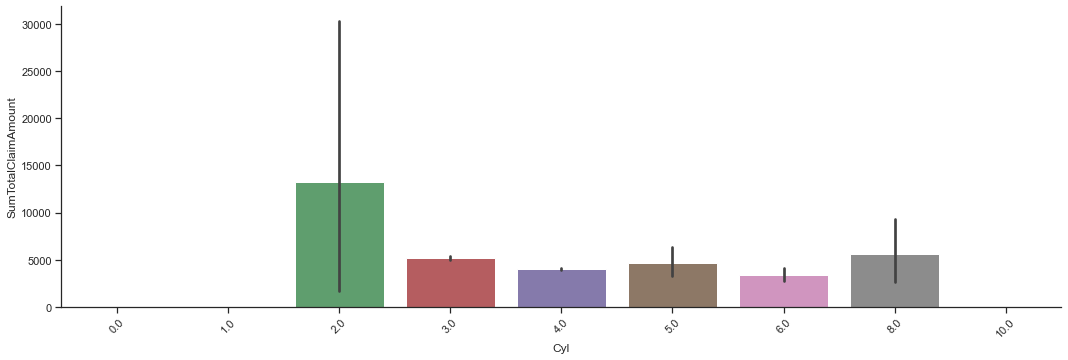

In [31]:
#Cylinder Capacity
sns.catplot(x="Cyl", y="SumTotalClaimAmount",
            data=df, kind='bar', height=5, aspect=3)
plt.xticks(rotation=45)
plt.show()

Vehicles with a cylinder capacity of 2 have more claim amounts

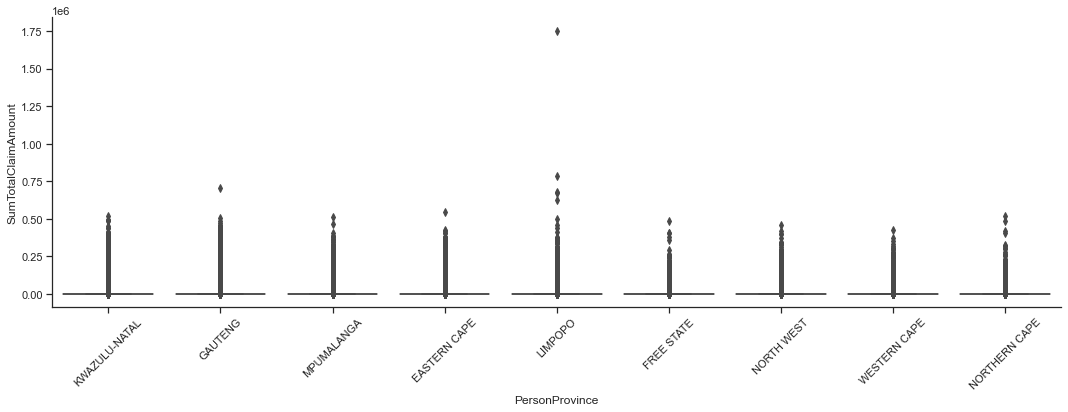

In [33]:
#Person Province
sns.catplot(x="PersonProvince", y="SumTotalClaimAmount",
            data=df, kind='box', height=5, aspect=3)
plt.xticks(rotation=45)
plt.show()

Limpopo province has the highest amount of claims

## Continuous Features
We will investigate how continuous features affect the claim amount

['PolicyId', 'ClaimId ', 'SumTotalClaimAmount', 'CountTotalClaimAmount', 'PremiumSum', 'CasePremiumSum', 'PaymentDueDate', 'TotalPremiumPaymentCount', 'PreviousInsurerExcess', 'PreviousInsurerPremium', 'EmploymentType', 'IsMemberPayer', 'Employer', 'Occupation', 'IndustryType', 'Gender', 'BirthDt', 'MaritalStatus', 'Make', 'Model', 'Colour', 'Transmission', 'VehicleType', 'BodyType', 'CubicCapacity', 'Cyl', 'Kilowatts', 'VehicleYear', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area', 'MonthsSinceInception', 'DaysSinceInception', 'PolicyStatus', 'CommencementDt', 'PolicyEndDate', 'SumAssured', 'MeanExcess', 'TotalExcess', 'ExcessTypesCount', 'BaseExcess', 'NomimatedDriversCount', 'NomimatedDriversUnder30Count', 'Age']


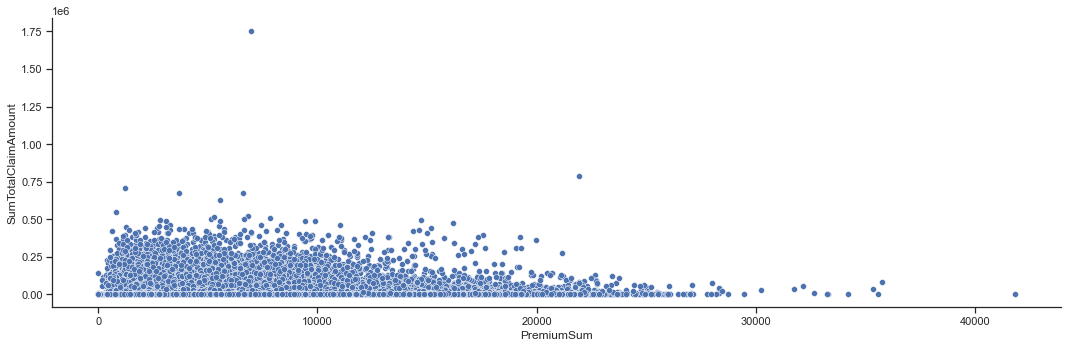

In [36]:
sns.relplot(x="PremiumSum", y="SumTotalClaimAmount", data=df, height=5, aspect=3)

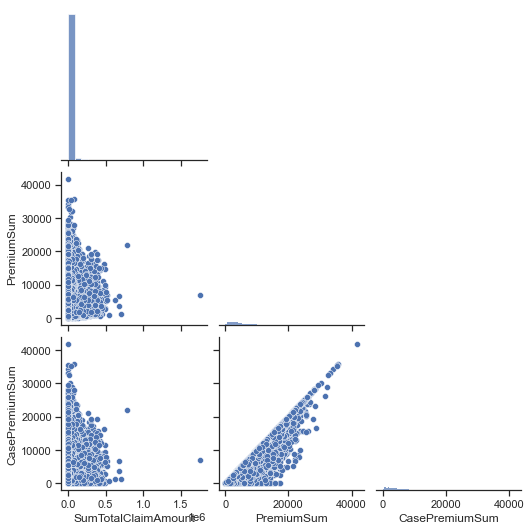

In [42]:
sns.pairplot(df[['SumTotalClaimAmount', 'PremiumSum', 'CasePremiumSum']], corner=True)

In [43]:
print(list(df.columns))

['PolicyId', 'ClaimId ', 'SumTotalClaimAmount', 'CountTotalClaimAmount', 'PremiumSum', 'CasePremiumSum', 'PaymentDueDate', 'TotalPremiumPaymentCount', 'PreviousInsurerExcess', 'PreviousInsurerPremium', 'EmploymentType', 'IsMemberPayer', 'Employer', 'Occupation', 'IndustryType', 'Gender', 'BirthDt', 'MaritalStatus', 'Make', 'Model', 'Colour', 'Transmission', 'VehicleType', 'BodyType', 'CubicCapacity', 'Cyl', 'Kilowatts', 'VehicleYear', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area', 'MonthsSinceInception', 'DaysSinceInception', 'PolicyStatus', 'CommencementDt', 'PolicyEndDate', 'SumAssured', 'MeanExcess', 'TotalExcess', 'ExcessTypesCount', 'BaseExcess', 'NomimatedDriversCount', 'NomimatedDriversUnder30Count', 'Age']


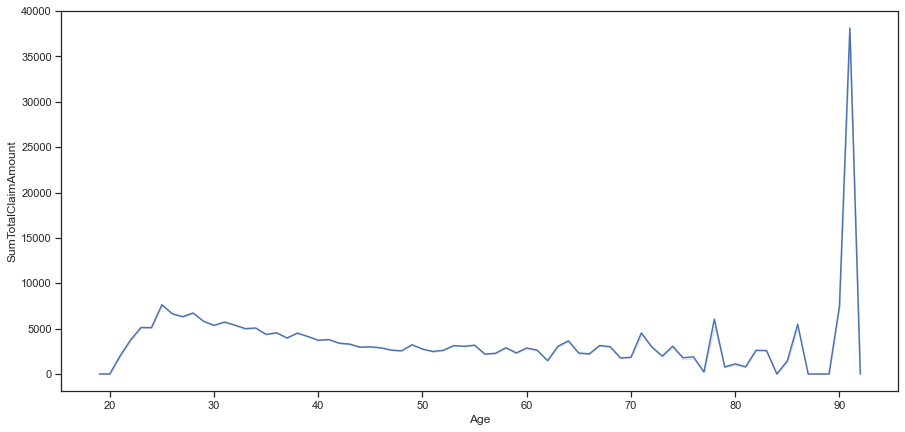

In [45]:
#Age
plt.figure(figsize=(15,7))
sns.lineplot(x=df["Age"], y=df["SumTotalClaimAmount"],ci=0)
plt.show()

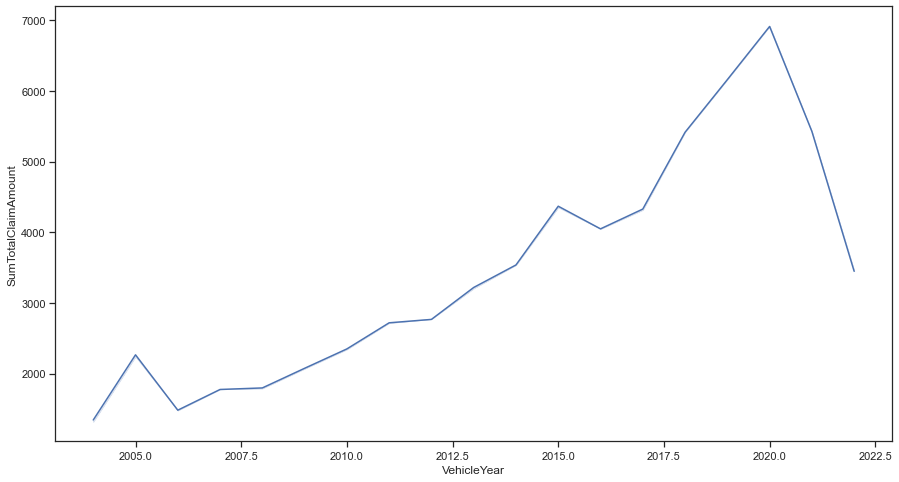

In [56]:
#Age
plt.figure(figsize=(15,8))
sns.lineplot(x="VehicleYear", y="SumTotalClaimAmount",data = df, ci=0)
plt.show()